**PREDICT NBA GAMES**

>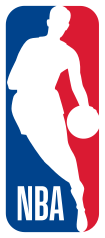







The National Basketball Association (NBA) is a professional basketball league in North America composed of 30 teams (29 in the United States and 1 in Canada). It is one of the major professional sports leagues in the United States and Canada and is considered the premier professional basketball league in the world.

The league was founded in New York City on June 6, 1946, as the Basketball Association of America (BAA). It changed its name to the National Basketball Association on August 3, 1949, after merging with the competing National Basketball League (NBL). In 1976, the NBA and the American Basketball Association (ABA) merged, adding four franchises to the NBA. The NBA's regular season runs from October to April, with each team playing 82 games. The league's playoff tournament extends into June. As of 2020, NBA players are the world's best paid athletes by average annual salary per player. [Wikipedia](https://en.wikipedia.org/wiki/National_Basketball_Association)


I am gonna try to predict NBA games winners. We use data from [Basketboll Reference](https://www.basketball-reference.com). I scraped and parsed data from this cite.

**General Information About Data**

There are stats for total (teams) stats and player of each team stats. [Basketboll Reference Glossary](https://www.basketball-reference.com/about/glossary.html)


- 3P - 3-Point Field Goals

- 3P% - 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA.

- 3PA - 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

- AST - Assists

- AST% - Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.

- BLK - Blocks (available since the 1973-74 season in the NBA)

- BLK% - Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.

- BPM - Box Plus/Minus (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 possessions that a player contributed above a league-average player, translated to an average team. Please see the article About Box Plus/Minus (BPM) for more information.

- DRB - Defensive Rebounds (available since the 1973-74 season in the NBA)

- DRB% - Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.

- DRtg - Defensive Rating (available since the 1973-74 season in the NBA); for players and teams it is points allowed per 100 posessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

- eFG% - Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%).

- FG - Field Goals (includes both 2-point field goals and 3-point field goals)

- FG% - Field Goal Percentage; the formula is FG / FGA.

- FGA - Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)

- FT - Free Throws

- FT% - Free Throw Percentage; the formula is FT / FTA.

- FTA - Free Throw Attempts

- MP - Minutes Played (available since the 1951-52 season)

- ORtg - Offensive Rating (available since the 1977-78 season in the NBA); for players it is points produced per 100 posessions, while for teams it is points scored per 100 possessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

- ORB - Offensive Rebounds (available since the 1973-74 season in the NBA)

- ORB% - Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.

- PTS - Points

- STL - Steals (available since the 1973-74 season in the NBA)

- STL% - Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.


- TOV - Turnovers (available since the 1977-78 season in the NBA)

- TOV% - Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.

- TRB - Total Rebounds (available since the 1950-51 season)

- TRB% - Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor.

- TS% - True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

- Usg% - Usage Percentage (available since the 1977-78 season in the NBA); the formula is 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.


**Note:** Tm means **Team** and Opp means **Opposite**

- 3Par: 3PA/FG
- Ftr: FTA/FGA
- TSA: TSA - True Shooting Attempts; the formula is FGA + 0.44 * FTA.

In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
pip install catboost

In [292]:
import os                                                       #Import os library
import pandas as pd                                             #Import pandas library
import numpy as np                                              #Import numpy library
import matplotlib.pyplot as plt                                 #Import matplotlib.pytplot library
import seaborn as sns                                           #Import seaborn library
from tqdm import tqdm                                           #Import tqdm library
import time                                                     #Import time library
import joblib                                                   #Import joblib library

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


# CONFIGURATION

In [293]:
class config:
    train_path_team = "/content/drive/MyDrive/Colab_Notebooks/NBA_Predict_V2/nba_games_V6_081123_02_04.csv"
    train_path_player = "/content/drive/MyDrive/Colab_Notebooks/NBA_Predict_V2/nba_players_V6_081123_02_04.csv"
    model_path = "/content/drive/MyDrive/Colab_Notebooks/NBA_Predict_V2/models"


    not_fe_stats = ["3p", "3pa", "fg", "fga", "ft", "fta", "ast", "blk", "drb", "orb", "stl", "tov", "trb", \
                    "3p_opp", "3pa_opp", "fg_opp", "fga_opp", "ft_opp", "fta_opp", "ast_opp", "blk_opp", "drb_opp", "orb_opp", "stl_opp", "tov_opp", "trb_opp"]

    add_nextgame = True
    add_rolling_features = True
    add_diff_day = True
    add_win_streak = True
    add_winstreak_morethanone = True
    add_nextgame_opp_stats = True



    use_opp_features = False
    use_avg_features = False
    use_not_fe_stats = False
    not_use_high_correlated_features = True
    use_asist_sub_steal = True
    use_opp_features = False

    use_lda_technique = True
    use_pca_technique = False

    #use_scaling_techniques = True

    use_xgboost_modeling = True
    use_catboost_modeling = False


    show_graph = True
    fix_names = True

    n_splits = 5
    seed = 42
    threshold_pca_tehnique = 0.85

# UTILS

In [294]:
def draw_countplot(dataframe : pd.DataFrame, x_axis : str, col_hue : str):
  # Parameters:
  # dataframe: Dataframe which will draw
  # x_axis: X axis for graph
  # col_hue: Column which using in hue parameter of graph

  # Create figüre with size
  plt.figure(figsize = (20,10))

  ax = sns.countplot(x = x_axis, hue = col_hue, data = dataframe)

  # Annotate the boxes
  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

  plt.title(f"Relationship between {x_axis} and {col_hue}")
  plt.show()

In [295]:
def add_target(group: pd.core.groupby.generic.DataFrameGroupBy) -> pd.core.groupby.generic.DataFrameGroupBy:
    """
    This function adds a target column indicating whether each team has won or lost in the next match

    Parameter:
        group: Groupby object
    """
    group["target"] = group["won"].shift(-1)
    return group

In [296]:
def feature_type(dataframe: pd.DataFrame) -> list:
    """
    This function determine type of features.

    Parameter:
        dataframe : pd.DataFrame object

    Return:
        categorical_features: categorical features of dataframe
        object_features:      object_features features of dataframe
        numerical_features:   numerical_features features of dataframe
    """
    #Determine type of features
    categorical_features = ["team", "home", "team_opp", "home_opp", "season", "won", "target"]
    object_features = [col for col in dataframe.select_dtypes(include = "object") if not col in categorical_features]
    numerical_features = [col for col in dataframe.select_dtypes(include = "number") if not col in categorical_features]

    return categorical_features, object_features, numerical_features

In [297]:
def first_process(dataframe: pd.DataFrame) -> pd.DataFrame:
    #Drop first column
    dataframe = dataframe.iloc[:,1:]

    #Drop mp and mp_opp features
    dataframe = dataframe.drop(["mp", "mp_opp", "pts", "pts_opp"], axis = 1)
    #Change some features datatype
    dataframe["won"] = dataframe["won"].astype(int)
    dataframe["date"] = pd.to_datetime(dataframe["date"])

    #Add target feature to dataframe
    dataframe = dataframe.groupby("team", group_keys=False).apply(add_target)

    #Chech count of null values in dataframe
    for col in dataframe.columns:
        null_count = dataframe[col].isnull().sum()
        if null_count != 0:
            print(f"There are {null_count} missing values in {col} feature !!!!!!!!!!!!!!!!!!!!!! \n")


    #Check duplicated rows
    print(f"Total duplicated row count: {dataframe.duplicated().sum()}  !!!!!!!!!!!!!!!!!!!!!!! \n")

    #Check duplicated features
    duplicated_features = dataframe.columns[dataframe.columns.duplicated()].unique()
    print(f"Total duplicated feature count : {len(duplicated_features)}   !!!!!!!!!!!!!!!!!!!!!!! \n")


    #Drop feature with has a one unique number
    one_unique_number = [col for col in dataframe.columns if len(dataframe[col].unique()) == 1]
    print(f"Features with has a one unique number: {one_unique_number}")
    dataframe = dataframe.drop(one_unique_number, axis = 1)

    #Drop normal stats
    if not config.use_not_fe_stats:
        dataframe = dataframe.drop(config.not_fe_stats, axis = 1)


    # Fix not proper percentage features
    percentage_features = [col for col in dataframe.columns if "%" in col]
    not_proper_percentage_features  = [col for col in percentage_features if dataframe[col].max() > 1]
    dataframe[not_proper_percentage_features] = dataframe[not_proper_percentage_features] / 100


    return dataframe

# Total Team Stats

In [298]:
df_team = pd.read_csv(config.train_path_team)

## EDA

In [299]:
df_team = first_process(df_team)
categorical_features, object_features, numerical_features = feature_type(df_team)

There are 30 missing values in target feature !!!!!!!!!!!!!!!!!!!!!! 

Total duplicated row count: 0  !!!!!!!!!!!!!!!!!!!!!!! 

Total duplicated feature count : 0   !!!!!!!!!!!!!!!!!!!!!!! 

Features with has a one unique number: ['+/-', 'usg%', '+/-_opp', 'usg%_opp']


In [300]:
df_team[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fg%,20586.0,0.462108,0.054891,0.269,0.424,0.461,0.500,0.687
3p%,20586.0,0.357163,0.089109,0.000,0.297,0.355,0.417,0.842
ft%,20586.0,0.772109,0.102335,0.143,0.708,0.778,0.842,1.000
pf,20586.0,20.135675,4.231359,6.000,17.000,20.000,23.000,42.000
ts%,20586.0,0.562606,0.061966,0.329,0.520,0.561,0.604,0.808
efg%,20586.0,0.526504,0.066349,0.286,0.480,0.524,0.571,0.795
3par,20586.0,0.358784,0.085931,0.045,0.300,0.357,0.416,0.692
ftr,20586.0,0.263926,0.091792,0.012,0.200,0.256,0.321,0.806
orb%,20586.0,0.228541,0.072758,0.000,0.176,0.226,0.277,0.558
drb%,20586.0,0.771470,0.072758,0.442,0.723,0.774,0.824,1.000


### Correlation

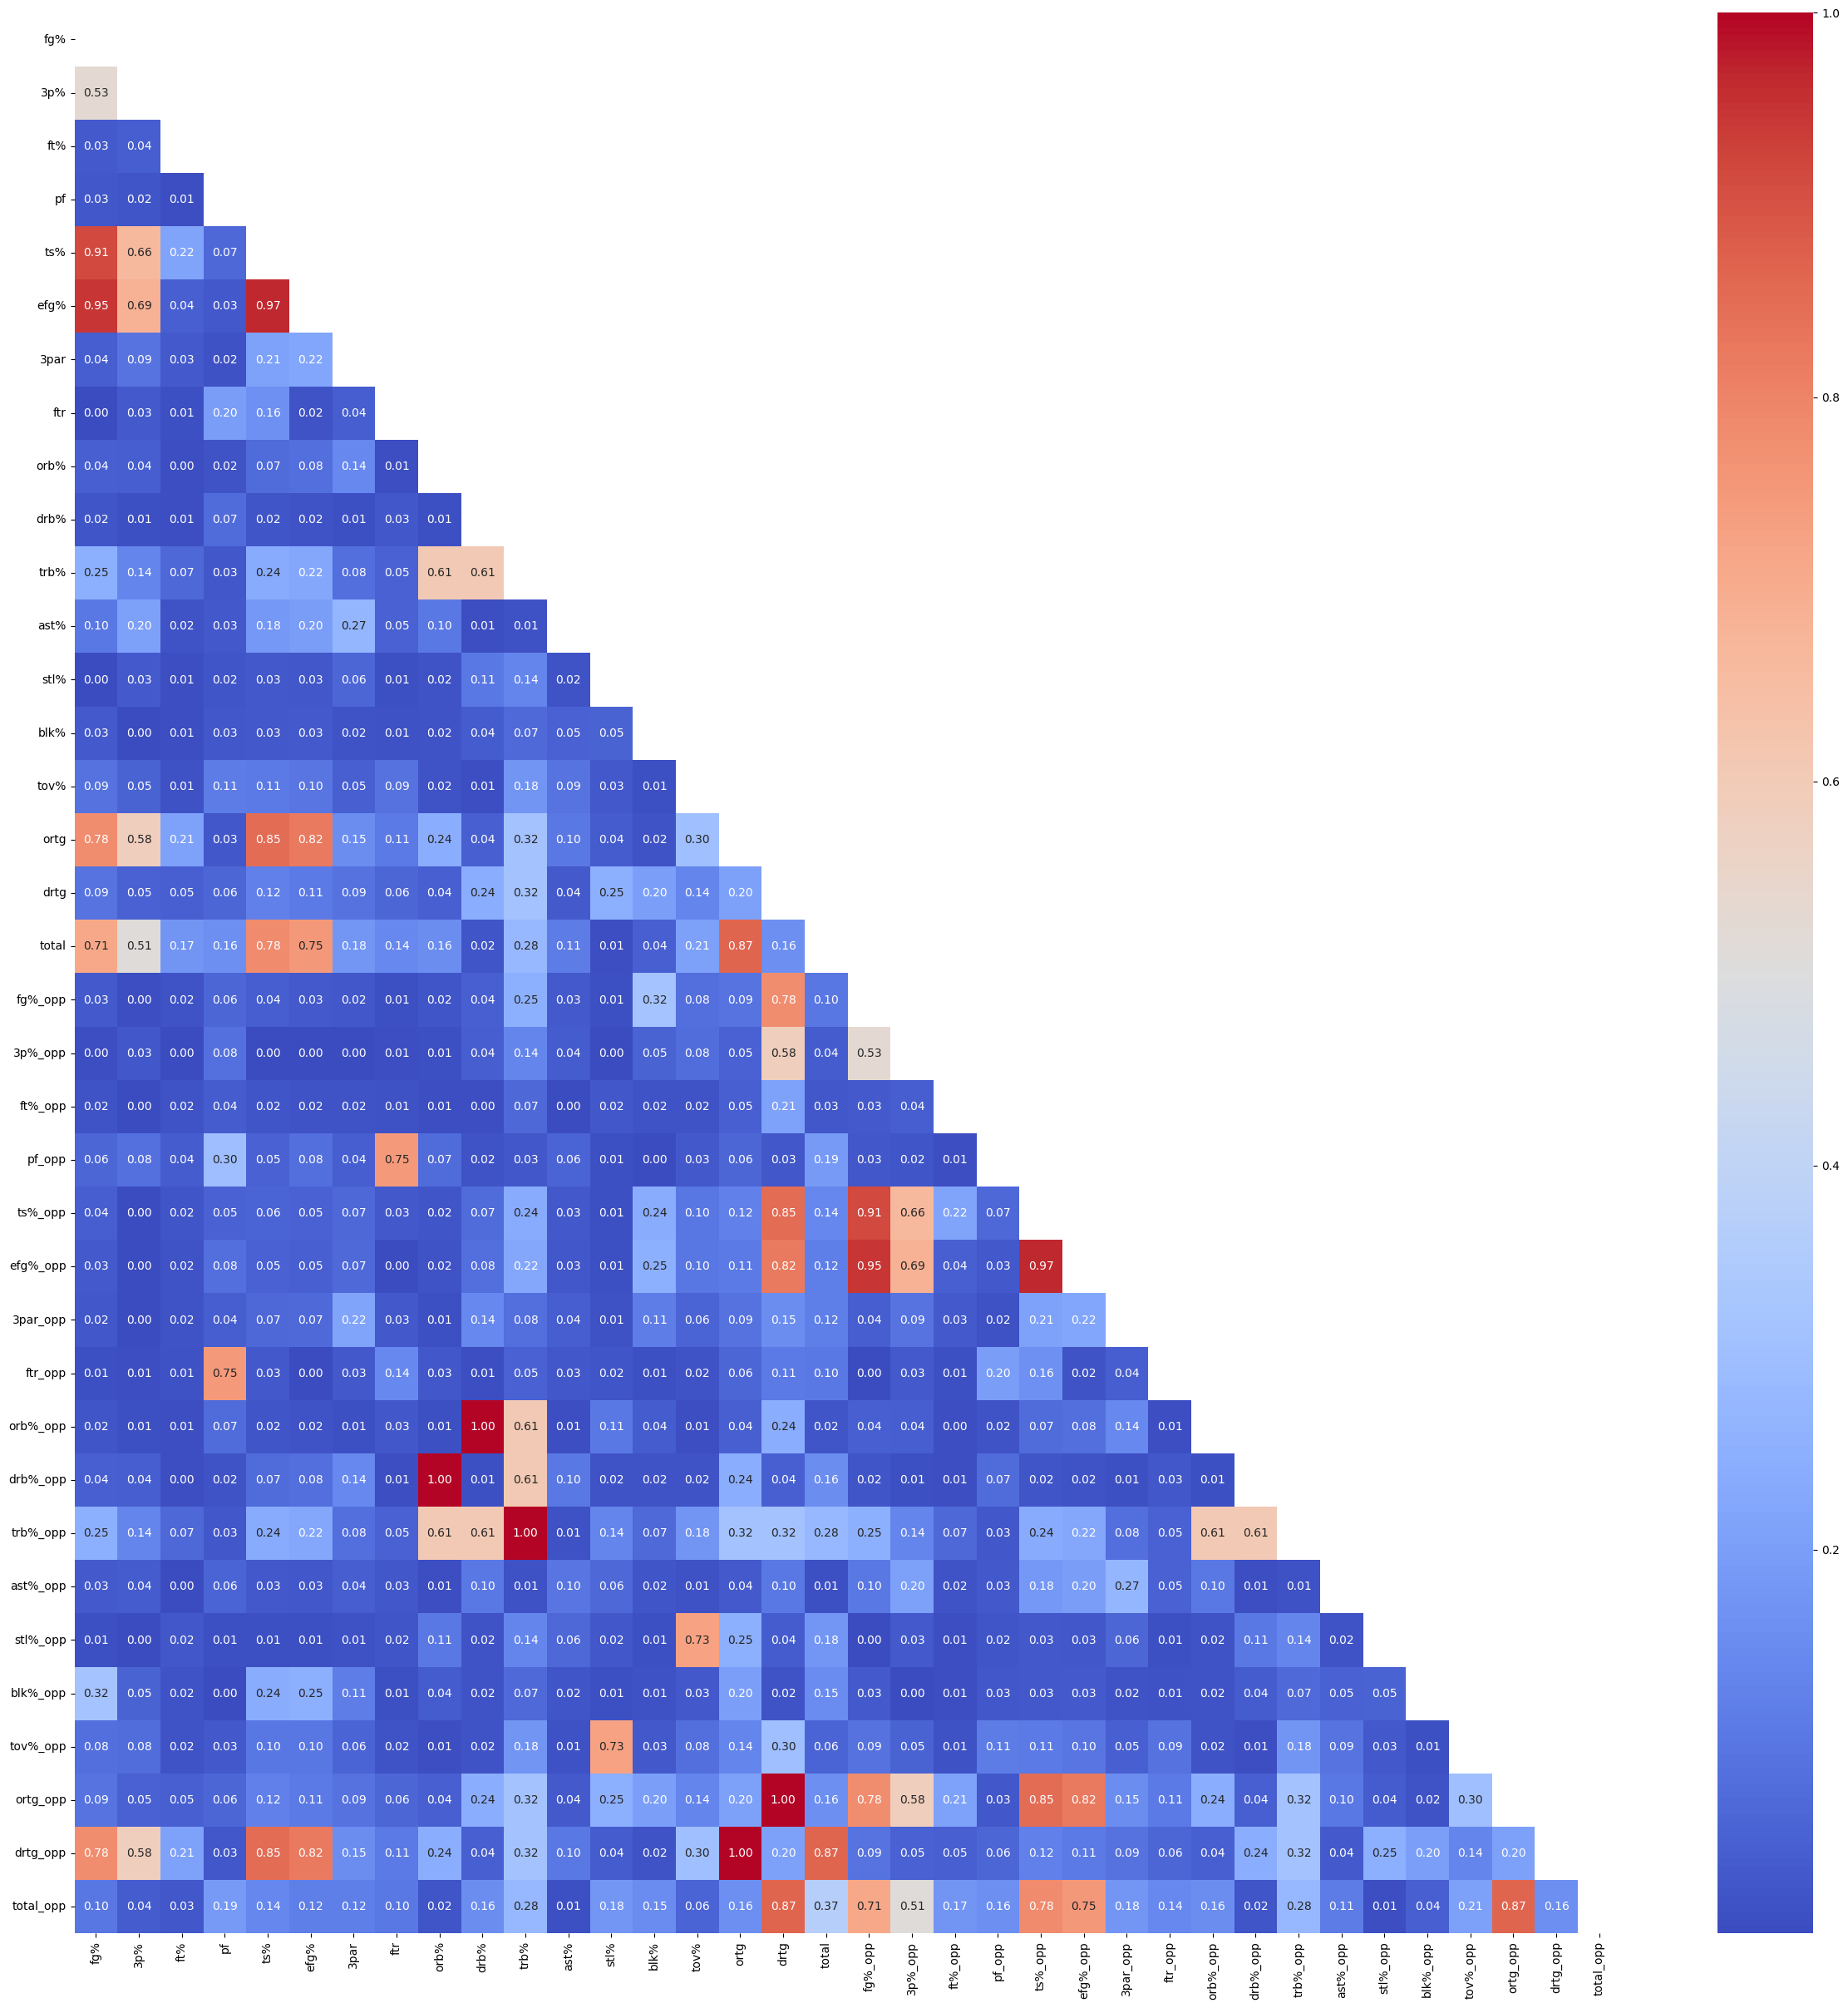

In [301]:
if config.show_graph:
    plt.figure(figsize = (30, 30))
    correlations = df_team[numerical_features].corr().abs()
    mask = np.triu(np.ones_like(correlations, dtype = bool))
    sns.heatmap(correlations, annot = True, fmt = ".2f", cmap = "coolwarm", mask = mask)
    plt.show()

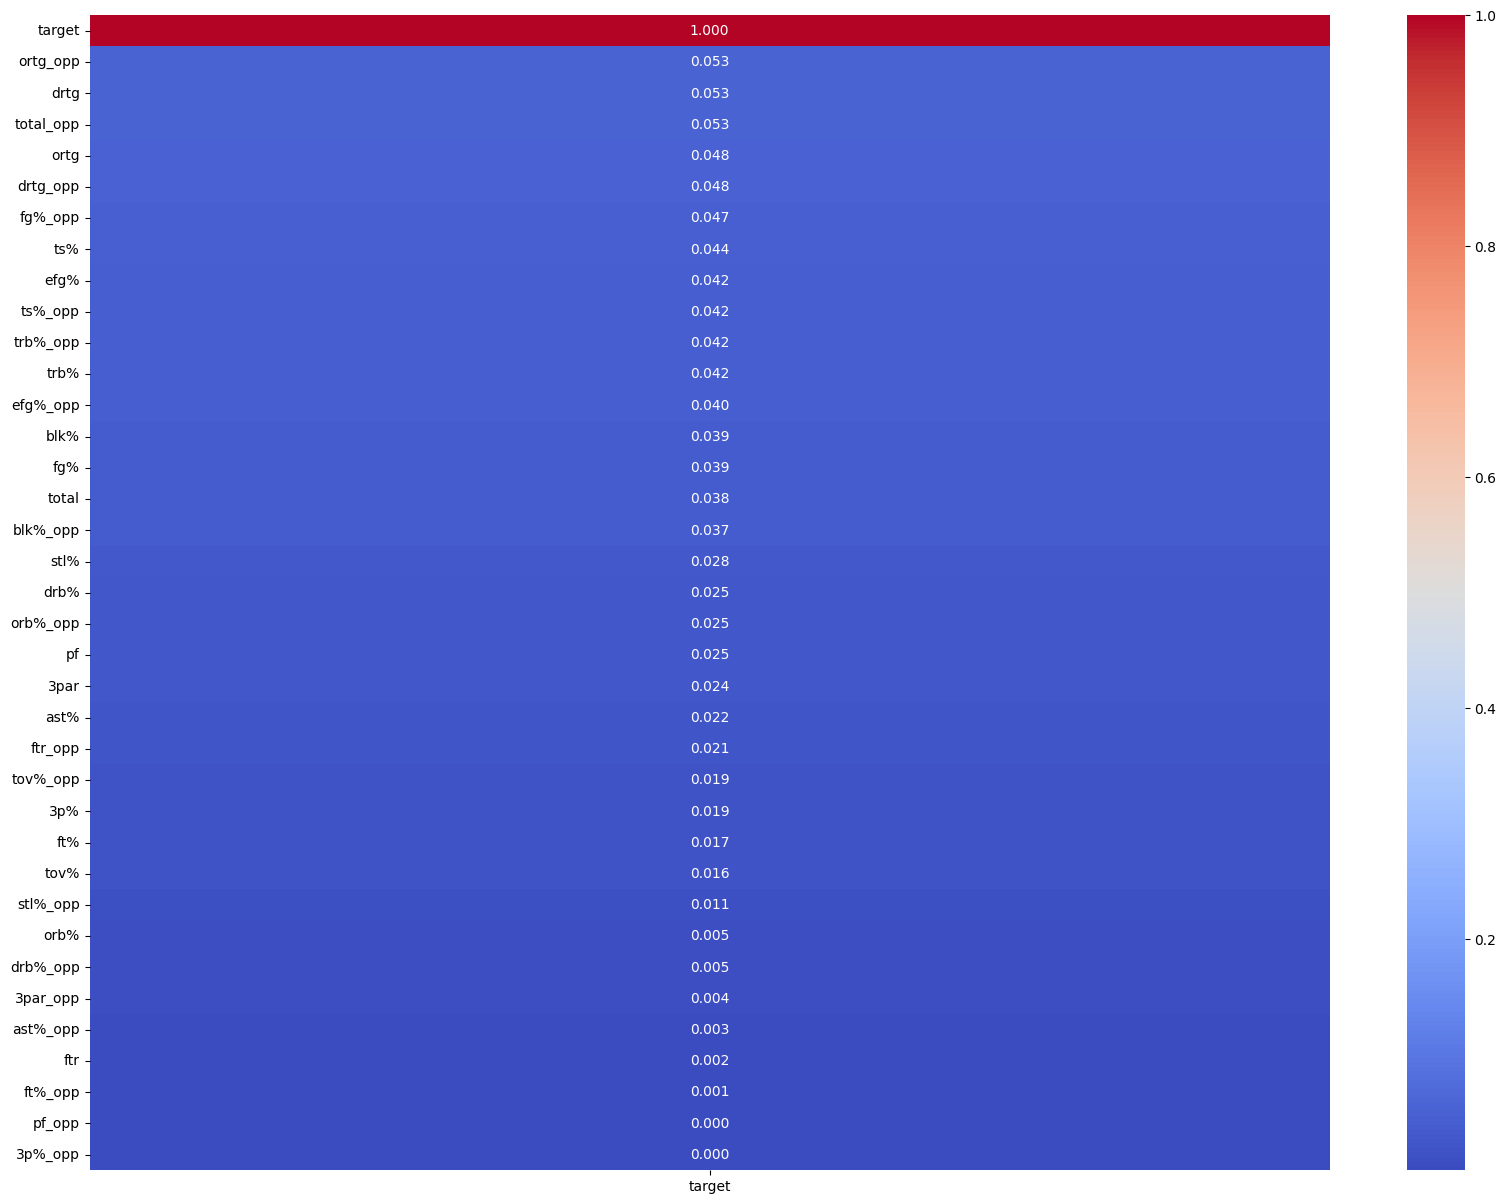

In [302]:
if config.show_graph:
    plt.figure(figsize = (20, 15))
    correlations_target = df_team[numerical_features + ["target"]].corr().abs()[["target"]].sort_values(by = "target", ascending = False)
    sns.heatmap(correlations_target, annot = True, fmt = ".3f", cmap = "coolwarm")
    plt.show()

In [303]:
df_team_corr = df_team[numerical_features].corr().abs()
upper_tri_df_team = df_team_corr.where(np.triu(np.ones(df_team_corr.shape),k=1).astype("bool"))
to_drop_2 = [column for column in upper_tri_df_team if any(upper_tri_df_team[column] > 0.80)]
def find_corelated_column(upper_tri,col):
    result = upper_tri[col][upper_tri[col] > 0.80]
    print(f"{col} features has correlation with {result.index.tolist()} as a rank {result.values} ")

for col in to_drop_2:
    find_corelated_column(upper_tri= upper_tri_df_team, col = col)

ts% features has correlation with ['fg%'] as a rank [0.91493521] 
efg% features has correlation with ['fg%', 'ts%'] as a rank [0.94618217 0.96573369] 
ortg features has correlation with ['ts%', 'efg%'] as a rank [0.85033324 0.82104896] 
total features has correlation with ['ortg'] as a rank [0.86704493] 
ts%_opp features has correlation with ['drtg', 'fg%_opp'] as a rank [0.85033324 0.91493521] 
efg%_opp features has correlation with ['drtg', 'fg%_opp', 'ts%_opp'] as a rank [0.82104896 0.94618217 0.96573369] 
orb%_opp features has correlation with ['drb%'] as a rank [0.99999902] 
drb%_opp features has correlation with ['orb%'] as a rank [0.99999902] 
trb%_opp features has correlation with ['trb%'] as a rank [0.99999686] 
ortg_opp features has correlation with ['drtg', 'ts%_opp', 'efg%_opp'] as a rank [1.         0.85033324 0.82104896] 
drtg_opp features has correlation with ['ts%', 'efg%', 'ortg', 'total'] as a rank [0.85033324 0.82104896 1.         0.86704493] 
total_opp features has 

- ts% and fg% features will remove
- drtg will remove
- ortg will remove

------------------------------------------------
- ts%_opp and fg%_opp will remove
- orb%_opp will remove
- ortg_opp will remove
- drtg_opp will remove









In [304]:
if config.not_use_high_correlated_features:
    df_team = df_team.drop(["ts%", "fg%", "ortg", "drtg", "ts%_opp", "fg%_opp", "orb%_opp", "ortg_opp", "drtg_opp"], axis = 1)

### Fix Names

In [305]:
if config.fix_names:
    # Create dictionary for fix names
    char_previous = "ÁāäàâáãČèéêëùûūîíôóçčģŠšýŽžğĞıİöÖüÜşŞçÇćò"
    char_next = "AaaaaaaCeeeeuuuiiooccgSsyZzgGiIoOuUsScCco"
    dict_translate_english_character = dict(zip(list(char_previous), list(char_next)))
    dict_translate_english_character["Ã¶"] = "o"
    dict_translate_english_character["Å¾"] = "o"
    dict_translate_english_character["ņģ"] = "ng"
    dict_translate_english_character["ņ"]  = "n"
    dict_translate_english_character["Å†Ä£"] = "ng"
    dict_translate_english_character["Iii"] = "III"
    dict_translate_english_character["Iv"] = "IV"
    dict_translate_english_character["İL"] = "Il"



    def fix_player_names(list_features: list, dataframe: pd.DataFrame) -> pd.DataFrame:
        """
        This function corrects the names inside the features. It gets these corrections from the dictionary named dict_translate_english_character

        Parameters:
            list_features: list of features which will fix
            dataframe: dataframe which has a list_features

        Return:
            dataframe: dataframe changed
        """
        for col in tqdm(list_features):
            for key, value in dict_translate_english_character.items():
                dataframe[col] = dataframe[col].apply(lambda x: str(x).replace(key, value))

        return dataframe


    def fix_player_names_fromlist(player_names_list: list) -> list:
        """
        This function corrects the names inside the list. It gets these corrections from the dictionary named dict_translate_english_character

        Parameters:
            player_names_list: list which has a player names


        Return:
            player_names_list: list changed
        """

        for index, player_name in enumerate(tqdm(player_names_list)):
            for key, value in dict_translate_english_character.items():
                player_names_list[index] = player_names_list[index].replace(key, value)

        return player_names_list

    playername_cols = [col for col in df_team.columns if "player" in col]
    df_team = fix_player_names(playername_cols, df_team)

100%|██████████| 20/20 [00:08<00:00,  2.33it/s]


## Feature Engineering

### Add Assist Subtraction Steal

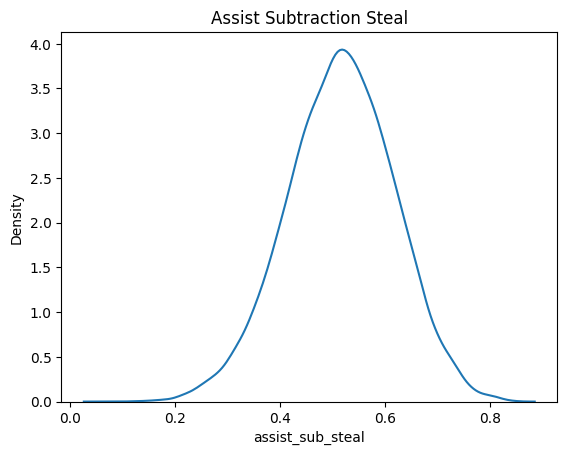

In [306]:
if config.use_asist_sub_steal:
    df_team["assist_sub_steal"] = df_team["ast%"] - df_team["stl%"]
    df_team = df_team.drop(["ast%", "stl%", "ast%_opp", "stl%_opp"], axis = 1)

    if config.show_graph:
        sns.kdeplot(data = df_team["assist_sub_steal"])
        plt.title("Assist Subtraction Steal")
        plt.show()

### Add Rolled Features

In [307]:
categorical_features, object_features, numerical_features = feature_type(df_team)
if config.add_rolling_features:
    group = ["season", "team"]
    extract_features = [col for col in numerical_features if not "target" in col] + ["won"]
    group_str = "_".join(group)
    rolled_cols = list()
    for col in tqdm(extract_features):
        for roll in [5]:
            rolled = df_team.groupby(group, as_index=False)[col].rolling(roll, min_periods = 1, closed = "both")
            df_team[f"{col}_rolled_{group_str}_mean_{roll}"] = rolled.mean().fillna(0)[col]

100%|██████████| 25/25 [00:00<00:00, 30.28it/s]


### Add Next Game Info

100%|██████████| 23/23 [00:00<00:00, 245.65it/s]


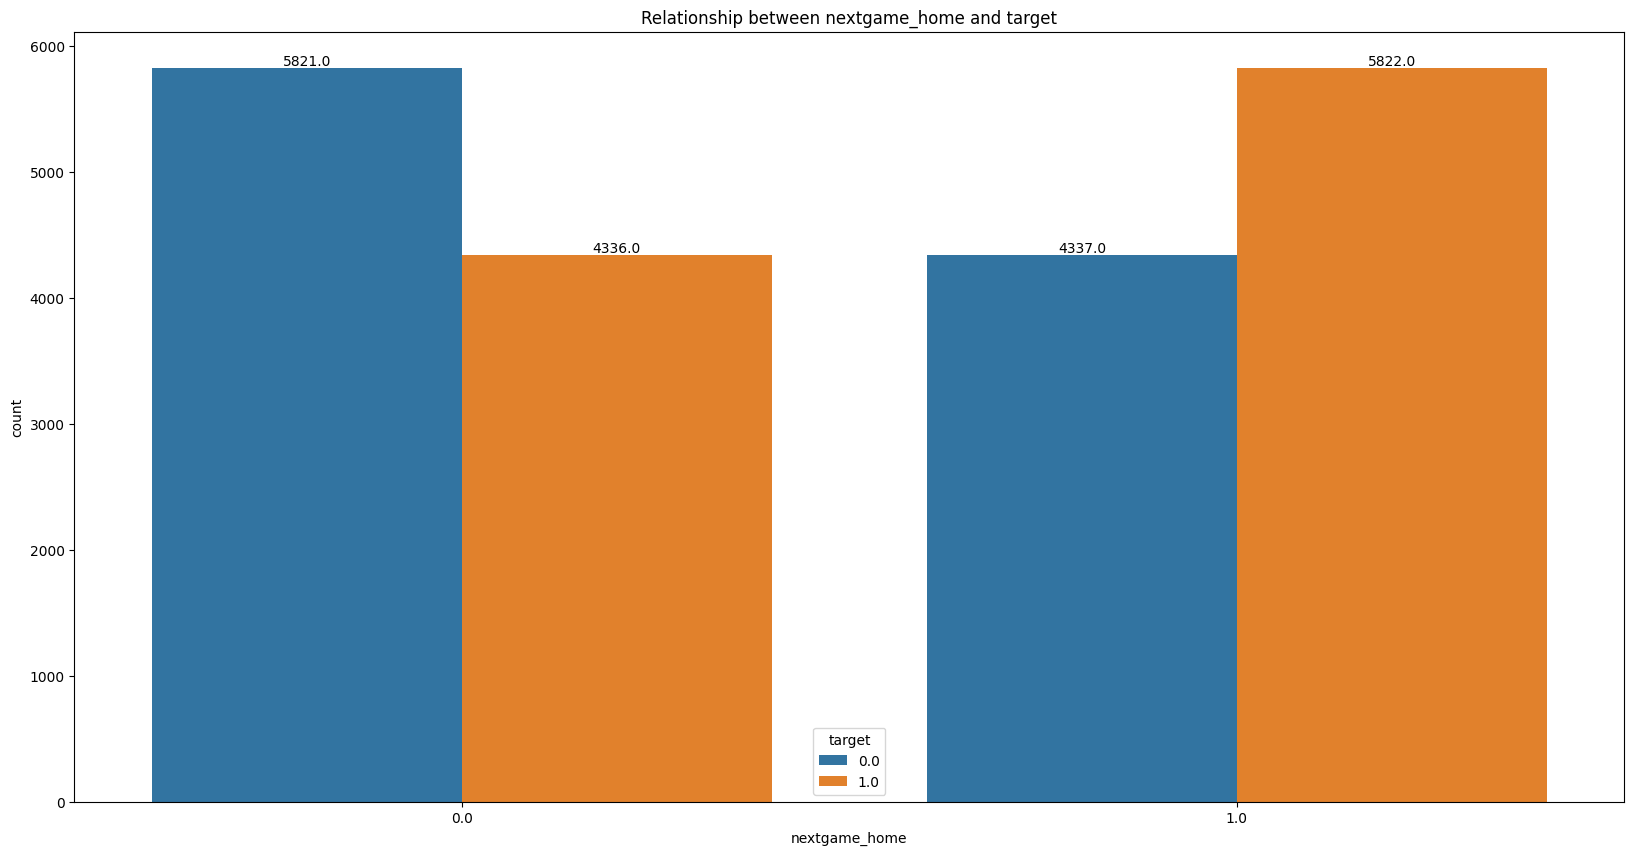

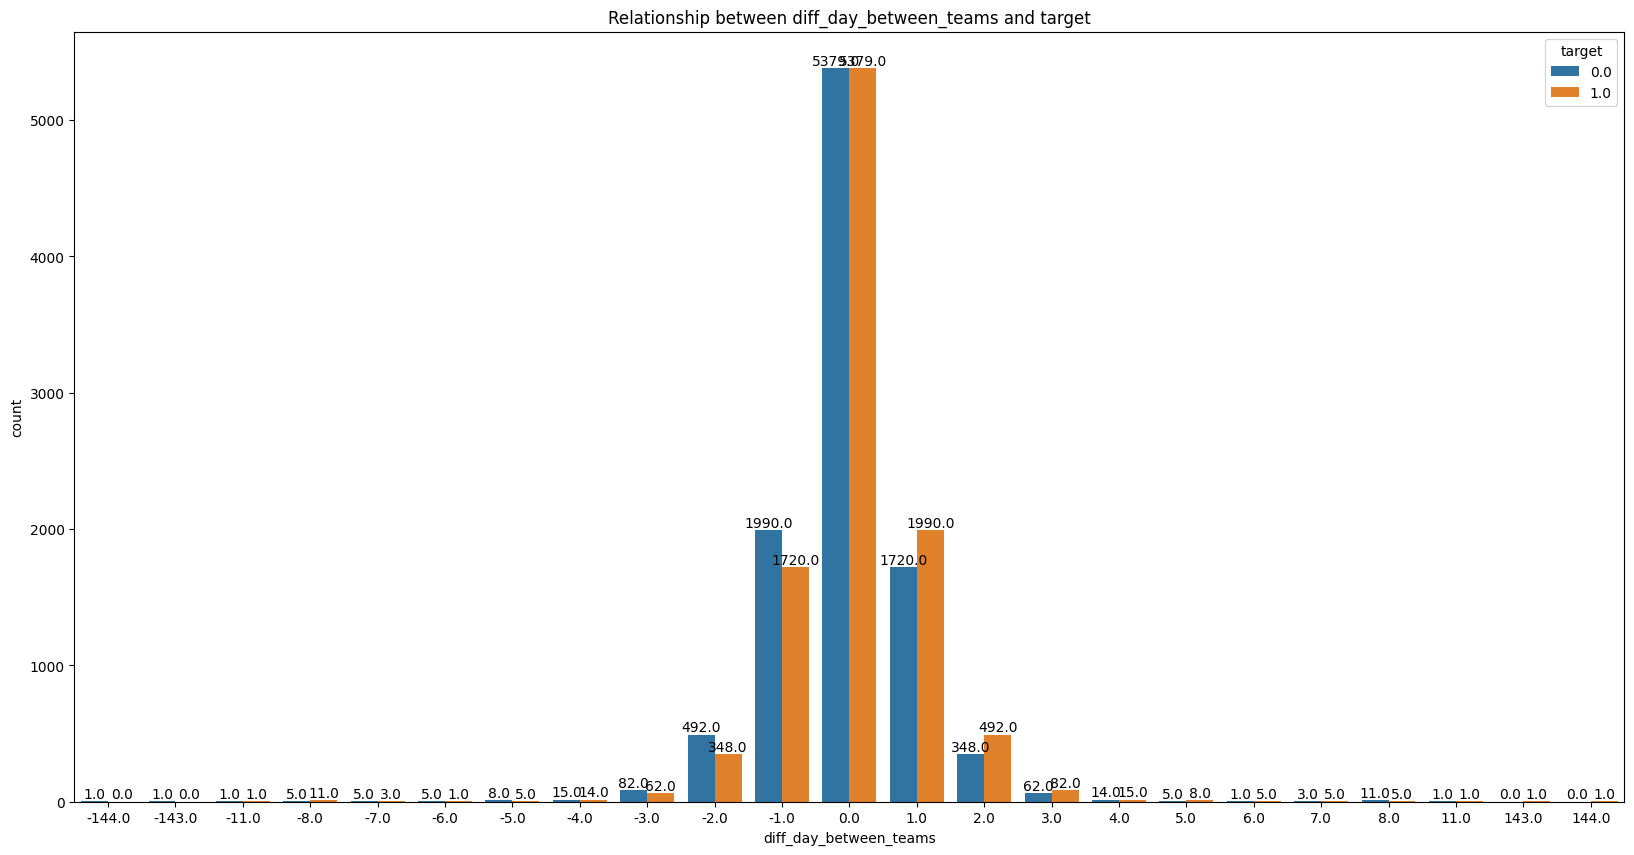

In [308]:
# Takımların sezonun son maçındaki nextgame sütunları NaN olacaktır.!!!!!!!!!!!!!!!!!!!!!!!!!!
# Ayrıca takımların son maçındaki nextgame sütunlarıda NaN olacaktır.
if config.add_nextgame:
    shifted_features = [col for col in object_features if "player" in col] + ["home", "date", "team_opp"]
    group = ["season", "team"]
    for col in tqdm(shifted_features):
        df_team[f"nextgame_{col}"] = df_team.groupby(group, group_keys = False)[col].shift(-1)

    if config.show_graph:
        # Draw counptlot for nextgame_home and target
        draw_countplot(df_team, "nextgame_home", "target")


    if config.add_nextgame_opp_stats:
        exclude_cols = ["target"]
        include_cols = [col for col in df_team.columns if not col in exclude_cols]
        a = df_team.merge(df_team[include_cols], left_on = ["nextgame_team_opp", "season", "nextgame_date"], right_on = ["team", "season", "nextgame_date"], suffixes = ("", "_nextgame_opp"), how= "left")
        df_team = a.drop("nextgame_team_opp", axis = 1) # Now, we have a "team_nextgame_opp" feature which same with "nextgame_team_opp". So, drop "nextgame_team_opp" feature

        duplicate_cols = ["nextgame_player_1_name_opp_nextgame_opp", "nextgame_player_2_name_opp_nextgame_opp", "nextgame_player_3_name_opp_nextgame_opp", "nextgame_player_4_name_opp_nextgame_opp",
                            "nextgame_player_5_name_opp_nextgame_opp", "nextgame_player_6_name_opp_nextgame_opp", "nextgame_player_7_name_opp_nextgame_opp", "nextgame_player_8_name_opp_nextgame_opp",
                                "nextgame_player_9_name_opp_nextgame_opp", "nextgame_player_10_name_opp_nextgame_opp", "nextgame_home_nextgame_opp", "nextgame_team_opp_nextgame_opp",
                                    "nextgame_player_1_name_opp", "nextgame_player_2_name_opp", "nextgame_player_3_name_opp", "nextgame_player_4_name_opp",
                                        "nextgame_player_5_name_opp", "nextgame_player_6_name_opp", "nextgame_player_7_name_opp", "nextgame_player_8_name_opp",
                                            "nextgame_player_9_name_opp", "nextgame_player_10_name_opp"]


        df_team = df_team.drop(duplicate_cols, axis = 1)

        if config.add_diff_day:
            df_team["diff_day_between_teams"] = (df_team["nextgame_date"] - df_team["date"]).dt.days - (df_team["nextgame_date"] - df_team["date_nextgame_opp"]).dt.days
            if config.show_graph:
                draw_countplot(df_team, "diff_day_between_teams", "target")



### Add Teams to Dataframe to Predict

In [309]:
if config.add_nextgame:
    def add_teams_to_predict(dataframe: pd.DataFrame, first_team: str, second_team: str, date: str, first_team_players: list, second_team_players: list) -> pd.DataFrame:

        nextgame_playername_cols = [col for col in dataframe.columns if "nextgame_player" in col and not "opp" in col]
        nextgame_opposite_playername_cols = [col for col in dataframe.columns if "nextgame_player" in col and "opp" in col]



        last_index_first_team = dataframe[dataframe["team"] == first_team].index[-1]
        last_index_second_team = dataframe[dataframe["team"] == second_team].index[-1]

        dataframe.loc[last_index_first_team, "nextgame_date"]  = pd.to_datetime(date)
        dataframe.loc[last_index_second_team, "nextgame_date"] = pd.to_datetime(date)

        dataframe.loc[last_index_first_team, "nextgame_home"]  = 0
        dataframe.loc[last_index_second_team, "nextgame_home"] = 1




        if config.fix_names:
            first_team_players  = fix_player_names_fromlist(first_team_players)
            second_team_players = fix_player_names_fromlist(second_team_players)

        dataframe.loc[last_index_first_team, nextgame_playername_cols] = first_team_players
        dataframe.loc[last_index_second_team, nextgame_playername_cols] = second_team_players

        if config.add_nextgame_opp_stats:
            nextgame_opp_cols = [col for col in df_team.columns if "nextgame_opp" in col]
            cols = [f"{col[:-13]}"  for col in nextgame_opp_cols] #to remove _nextgame_opp

            dataframe.loc[last_index_first_team, nextgame_opp_cols]  = dataframe.loc[last_index_second_team, cols].values
            dataframe.loc[last_index_second_team, nextgame_opp_cols]  = dataframe.loc[last_index_first_team, cols].values

            if config.add_diff_day:
                dataframe.loc[last_index_first_team, "diff_day_between_teams"] = (dataframe.loc[last_index_first_team, "nextgame_date"]- dataframe.loc[last_index_first_team, "date"]).days - (dataframe.loc[last_index_first_team, "nextgame_date"]- dataframe.loc[last_index_first_team, "date_nextgame_opp"]).days
                dataframe.loc[last_index_second_team, "diff_day_between_teams"] = (dataframe.loc[last_index_second_team, "nextgame_date"]- dataframe.loc[last_index_second_team, "date"]).days - (dataframe.loc[last_index_second_team, "nextgame_date"]- dataframe.loc[last_index_second_team, "date_nextgame_opp"]).days


        return dataframe





    # ------------------- INSERT THE TEAMS TO BE PREDICTED HERE IN THE APPROPRIATE FORMAT--------------------------------------------------------
    df_team = add_teams_to_predict(dataframe = df_team,first_team="TOR", second_team="CHI", date = "2023-02-19 20:00:00",
                                first_team_players = ["OG Anunoby", "Pascal Siakam", "Scottie Barnes", "Jakob Poeltl", "Gary Trent Jr.",
                                            "Jeff Dowtin", "Chris Boucher", "Precious Achiuwa", "OG Anunoby", "Pascal Siakam"],

                                second_team_players= ["DeMar DeRozan", "Zach LaVine", "Nikola Vučević", "Patrick Beverley", "Alex Caruso",
                                            "Coby White", "Patrick Williams", "Ayo Dosunmu", "DeMar DeRozan", "Zach LaVine"])


100%|██████████| 10/10 [00:00<00:00, 36759.89it/s]


### Add Win Streak

In [310]:
if config.add_win_streak:
    df_team["win_streak"] = df_team.groupby(['team', 'season'], group_keys = False)['won'].apply(lambda x: (x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1))).astype(int)
    if config.add_winstreak_morethanone:
        df_team["is_winstreak_morethanone"] = df_team["win_streak"] > 1
        df_team["is_winstreak_morethanone"] = df_team["is_winstreak_morethanone"].astype(int)
        df_team = df_team.drop("win_streak", axis = 1)

# MODELING

## Preparation

In [311]:
exclude_cols = ["home_opp", "home_opp_nextgame_opp"]
df_team = df_team.drop(exclude_cols, axis = 1)

In [312]:
null_counts = df_team.isnull().sum()
print(f"This is a count of null values: \n{null_counts[null_counts > 0]}")
print("*"*120)

features_null = [col for col in list(null_counts[null_counts > 0].index) if not "target" in col]
df_team = df_team.dropna(subset = features_null).reset_index(drop = True)
null_counts = df_team.isnull().sum()
print(f"This is a count of null values: \n{null_counts[null_counts > 0]}")

This is a count of null values: 
target                                   30
nextgame_player_1_name                  268
nextgame_player_2_name                  268
nextgame_player_3_name                  268
nextgame_player_4_name                  268
                                       ... 
nextgame_player_7_name_nextgame_opp     286
nextgame_player_8_name_nextgame_opp     286
nextgame_player_9_name_nextgame_opp     286
nextgame_player_10_name_nextgame_opp    286
diff_day_between_teams                  286
Length: 98, dtype: int64
************************************************************************************************************************
This is a count of null values: 
target    2
dtype: int64


In [313]:
categorical_features = ["team", "team_opp", "team_nextgame_opp", "team_opp_nextgame_opp","home", "nextgame_home", "home_nextgame_opp", "season", "won", "won_nextgame_opp", "is_winstreak_morethanone"]
object_features = [col for col in df_team.select_dtypes(include = "object") if not col in categorical_features]
numerical_features = [col for col in df_team.select_dtypes(include = "number") if not col in categorical_features and not col in ["target", "diff_day_between_teams"]]


if not config.use_opp_features:
    if not config.use_not_fe_stats:
        base_features = ["3p%", "ft%", "pf", "efg%", "3par", "ftr","orb%", "drb%", "trb%", "blk%", "tov%", "total"]
        opp_base_features = set([col for col in numerical_features for col2 in base_features if f"{col2}_opp" in col])
        numerical_features = [col for col in numerical_features if not col in opp_base_features]

    else:
        base_features = ["3p%", "ft%", "pf", "efg", "3par", "ftr", "orb%", "drb%", "trb%", "blk%", "tov%", "total"] + [col for col in config.not_fe_stats if not "opp" in col]
        opp_base_features = set([col for col in numerical_features for col2 in base_features if f"{col2}_opp" in col])
        numerical_features = [col for col in numerical_features if not col in opp_base_features]

### Scaling

In [314]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
df_team["team"] = encoder.fit_transform(df_team["team"])
df_team["team_opp"] = encoder.transform(df_team["team_opp"])
df_team["team_nextgame_opp"] = encoder.transform(df_team["team_nextgame_opp"])
df_team["team_opp_nextgame_opp"] = encoder.transform(df_team["team_opp_nextgame_opp"])

std_scaler = StandardScaler()
df_team[numerical_features] = std_scaler.fit_transform(df_team[numerical_features])

df_team[categorical_features] = df_team[categorical_features].astype(int)

#### LDA

In [316]:
if config.use_lda_technique:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()
    X = df_team.dropna(subset = "target").reset_index(drop = True)[numerical_features]
    y = df_team.dropna(subset = "target").reset_index(drop = True)["target"]
    X_lda = lda.fit_transform(X, y)
    # Calculate explained variance ratio for each component
    explained_variance_ratio = lda.explained_variance_ratio_
    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    # Find the number of components that explain at least 75% of the variance
    n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1

    # Print the number of components selected
    print(f"Number of components selected: {n_components}")

    X = lda.transform(X)[:, :n_components]
    X = pd.DataFrame(X, columns = ["feature_0"])
    df_team = df_team.drop(numerical_features, axis = 1)
    df_team = pd.concat([df_team, X], axis = 1)
    numerical_features = list(X.columns)

Number of components selected: 1


#### PCA

In [317]:
if config.use_pca_technique:
    from sklearn.decomposition import PCA
    #Create PCA instance
    pca = PCA()
    #Fit and transform PCA to dataframe
    X_features = pca.fit_transform(df_team[numerical_features])

    # Calculate the cumulative explained variance
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Determine the number of components to keep for threshold_pca_tehnique variance explained
    n_components = np.argmax(cumulative_variance_ratio >= config.threshold_pca_tehnique) + 1
    print(f"Number of Components for Features: {n_components}")

    if config.show_graph:
        plt.figure(figsize = (20, 12))
        sns.lineplot(cumulative_variance_ratio, color = "orange")
        sns.lineplot(x = list(range(1,len(numerical_features))), y = config.threshold_pca_tehnique, color = "red")
        sns.scatterplot(cumulative_variance_ratio, color = "darkblue")
        plt.title("Cumulative Variance Ratio for Base Features")
        plt.ylabel("Cumulative Variance Ratio")
        plt.xticks(list(range(1,len(numerical_features))))
        plt.show()



    #Create PCA instance
    pca = PCA(n_components=n_components)
    #Fit and transform PCA to dataframe
    X_features = pca.fit_transform(df_team[numerical_features])
    X_features = pd.DataFrame(X_features, columns = [f"feature_{i}" for i in range(n_components)])

    df_team.drop(numerical_features, axis = 1)
    df_team = pd.concat([df_team, X_features], axis = 1)
    numerical_features = list(X_features.columns)

## Apply Model

In [318]:
param_catboost = {
                    "one_hot_max_size": 120,
                    "cat_features": categorical_features,
                    'learning_rate': 0.003,
                    "iterations": 5000,
                    "random_state": config.seed,
                    "eval_metric": "Accuracy",
                    "depth": 7,
                    "border_count": 254,
                    "grow_policy": "Depthwise",
                    "allow_writing_files": False,
                    "use_best_model": True,
                    "early_stopping_rounds":500
}
param_xgb = {
                    "learning_rate": 0.01,
                    "n_estimators": 200,
                    "max_depth": 6,
                    "objective": "binary:logistic",
                    #"tree_method": "gpu_hist",  # GPU acceleration
                    "random_state": config.seed,  # Set a random state for reproducibility
                    "eval_metric": "logloss",
                    "early_stopping_rounds": 500
}


classifiers = dict()
if config.use_xgboost_modeling:
    classifiers["XGBClassifier"] = XGBClassifier(**param_xgb)
if config.use_catboost_modeling:
    classifiers["CatBoostClassifier"] = CatBoostClassifier(**param_catboost)

def create_model(
                X: pd.DataFrame,
                y: pd.Series,
                cv: TimeSeriesSplit,
                classifiers: dict,
                feature_list: list
):
    accuracy_scores = list()
    f1_scores = list()
    models = list()
    for name, model in classifiers.items():
        print(f"Evaluating {name}...")
        fold_accs = list()
        fold_f1_scores = list()
        elapsed_time = 0
        for idx, (train_idx, val_idx) in enumerate(cv.split(X=X, y = y)):
            start_time = time.time()


            X_train = X.loc[train_idx, feature_list].copy()
            y_train = y.loc[train_idx].copy()
            X_val = X.loc[val_idx, feature_list].copy()
            y_val = y.loc[val_idx].copy()


            print(f'train: {X_train.shape}')
            print(f'val: {X_val.shape}')

            model.fit(X_train,
                        y_train,
                        eval_set=[(X_val, y_val)],

                        verbose=250)
            val_pred = model.predict(X_val)

            fold_acc = accuracy_score(y_true = y_val, y_pred = val_pred)
            fold_f1_score = f1_score(y_true = y_val, y_pred = val_pred)

            print(f"\n{name} Model Fold {idx + 1} Accuracy_Score:{fold_acc}")
            print(f"{name} Model Fold {idx + 1} F1 Score: {fold_f1_score} \n")

            fold_accs.append(fold_acc)
            fold_f1_scores.append(fold_f1_score)

            model_file_path = f"{name}_fold_{idx + 1}.pkl"
            joblib.dump(model, os.path.join(config.model_path, model_file_path))
            models.append(model)

            end_time = time.time()
            elapsed = end_time - start_time
            print(f"Time to {name} Model for Fold {idx + 1}: {elapsed}")
            print("*"*120)

            elapsed_time += elapsed

        print(f"{name} model run time is : {elapsed_time} seconds")
        print(f"{name} model has a mean of Accuracy Score: {np.mean(fold_accs)}")
        print(f"{name} model has a mean of F1 Score: {np.mean(fold_f1_scores)}")
        print("*"*120)

        accuracy_scores.append(fold_accs)
        f1_scores.append(fold_f1_scores)

    return accuracy_scores, f1_scores, models

In [319]:
cv = TimeSeriesSplit(config.n_splits)
X, y = df_team.dropna(subset = "target").reset_index(drop= True).drop("target", axis = 1), df_team.dropna(subset = "target").reset_index(drop= True)["target"]
accuracy_scores, f1_scores, models  = create_model(X = X,
                                                        y = y,
                                                        cv = cv,
                                                        classifiers = classifiers,
                                                        feature_list = numerical_features + categorical_features)


Evaluating XGBClassifier...
train: (3383, 12)
val: (3383, 12)
[0]	validation_0-logloss:0.69238
[199]	validation_0-logloss:0.65688

XGBClassifier Model Fold 1 Accuracy_Score:0.6154300916346438
XGBClassifier Model Fold 1 F1 Score: 0.6163373636095547 

Time to XGBClassifier Model for Fold 1: 1.3183515071868896
************************************************************************************************************************
train: (6766, 12)
val: (3383, 12)
[0]	validation_0-logloss:0.69225
[199]	validation_0-logloss:0.64219

XGBClassifier Model Fold 2 Accuracy_Score:0.6370085722731303
XGBClassifier Model Fold 2 F1 Score: 0.6371158392434988 

Time to XGBClassifier Model for Fold 2: 0.5737991333007812
************************************************************************************************************************
train: (10149, 12)
val: (3383, 12)
[0]	validation_0-logloss:0.69242
[199]	validation_0-logloss:0.66303

XGBClassifier Model Fold 3 Accuracy_Score:0.6012415016257759
XGB